In [13]:
from qiskit import QuantumCircuit
from qiskit.primitives import BackendSamplerV2
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel 
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import sys
from qiskit.visualization import plot_histogram

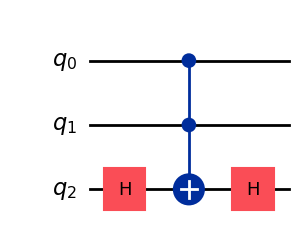

In [14]:
#Define the oracle here
#Oracle from the subject
oracle = QuantumCircuit(3)
oracle.h(2)
oracle.ccx(0,1,2)
oracle.h(2)
display(oracle.draw(output="mpl"))

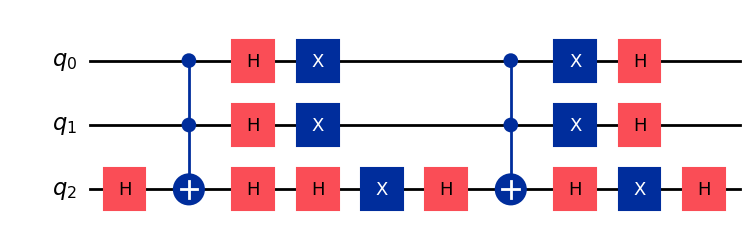

In [15]:
#Grover operator : Oracle + diffuser
n = oracle.num_qubits
if n < 2:
    sys.exit("Error : Qbit length is too short")

grover_operator = QuantumCircuit(n)
grover_operator.compose(oracle, inplace=True)
grover_operator.h(range(n))
grover_operator.x(range(n))
grover_operator.h(n-1)
grover_operator.mcx(list(range(n-1)), n-1)
grover_operator.h(n-1)
grover_operator.x(range(n))
grover_operator.h(range(n))

display(grover_operator.draw(output="mpl"))

In [16]:
k_opt = 1

if k_opt < 0:
    sys.exit("Error : nb of iteration must be greater or equal ")

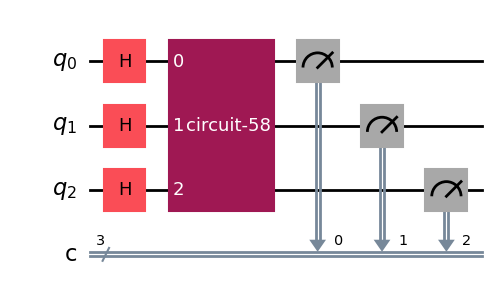

In [17]:
qc = QuantumCircuit(n, n)
qc.h(range(n))
qc.compose(grover_operator.power(k_opt), inplace=True)
qc.measure(range(n), range(n))
display(qc.decompose(reps=0).draw(output="mpl", style="iqp"))


In [18]:
noise_model = NoiseModel()
backend_sim = AerSimulator()
sampler_sim = BackendSamplerV2(backend=backend_sim)

target = backend_sim.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

sample = 500
qc_isa = pm.run(qc)
job = sampler_sim.run([qc_isa],shots=sample)

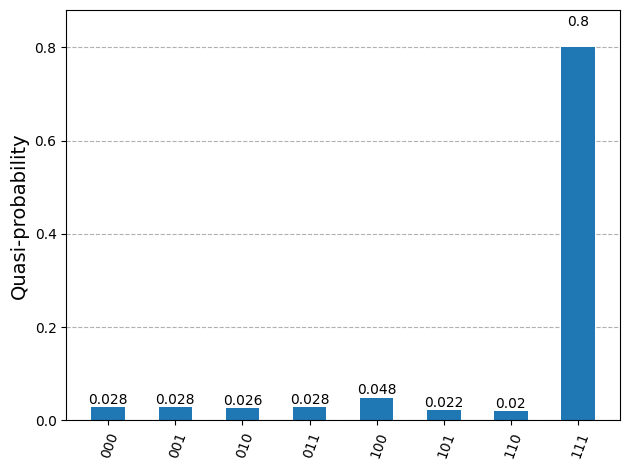

In [12]:
res = job.result()
counts = res[0].data.c.get_counts()
for key in counts:
    counts[key] = float(counts[key]) / sample
display(plot_histogram(counts))